# **Tratamento de dados - Classificação**

###  Notebook: `01_tratamento_de_dados_classificacao-final`

## 1. Importação das bibliotecas essenciais

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Ajustar parâmetros de plotagem

plt.rcParams["text.color"] = 'Black'
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["figure.figsize"] = [15, 6]
plt.rcParams["lines.linewidth"] = 2.0
plt.rcParams['grid.alpha'] = 0.90
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.rcParams['lines.markersize'] = 8.0

## 2. Importação dos datasets

O dataset importado a seguir contém algumas características dos contribuintes tais como porte, situação diferenciada ou 
especial e alguns valores relevantes para análise do contribuinte, como receita bruta, arrecadação, valor declarado em dctf
pagamentos, parcelamentos, suspensões e compensações.

O dataset foi obtido a partir da junção das bases de CNPJ, Arrecadação, DCTF, Devedores e Compensações disponíveis, mas não integradas, no Datalake corporativo da RFB.

<b>O campo CNPJ foi omitido da base tratada para evitar a quebra do sigilo fiscal. A base abaixo não será disponibilizada na 
apresentação do trabalho por conter dados fiscais que permitiriam identificar alguns contribuintes.</b>

In [3]:
dataset_base_class = pd.read_csv('puc_tcc_base_classificacao.csv')

## 3. Análises iniciais do dataset


In [4]:
len(dataset_base_class)

195708

In [5]:
dataset_base_class.head()

,nr_pessoa_juridica,status_porte_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,omissao_dctf,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,...,dctf_valor_comp_pag_indev,dctf_valor_deducao_darf,dctf_valor_suspenso,dctf_valor_parcelado,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp
0,27018624,Pequeno,Não,Não,0.00,NaN,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
1,12048428,Pequeno,Não,Não,0.00,NaN,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,18107915,Pequeno,Não,Não,0.00,NaN,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
3,27360348,Pequeno,Não,Não,0.00,NaN,Não,"30,462.79",0.00,0.00,...,0.00,0.00,0.00,0.00,"30,462.79",NaN,NaN,NaN,NaN,0.00
4,15969714,Pequeno,Não,Não,0.00,"15,401.09",Não,"28,152.53","28,152.53",0.00,...,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0.00


É possível verificar que grande parte dos dados possui valores ausentes. As próximas seções tratarão desta situação, inclusive avaliando a possibilidade de exclusão de linhas do dataset.

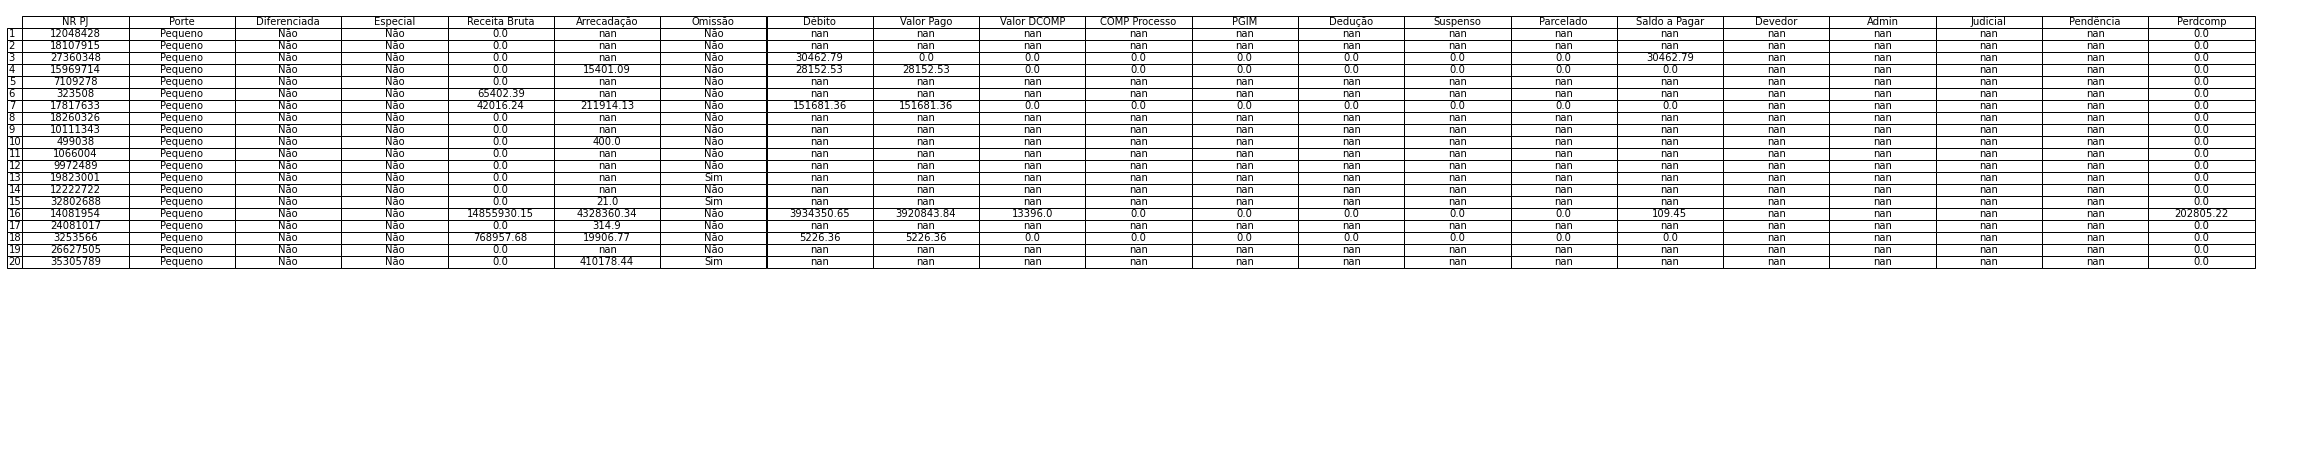

In [6]:
# Criando uma imagem com o dataset inicial

import matplotlib.pylab as plb
from pandas.plotting import table

subdataset = dataset_base_class[1:][:20].copy()

# set fig size
fig, ax = plt.subplots(figsize=(40, 8)) 
# no axes
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
# no frame
ax.set_frame_on(False)  

columnHeader=['NR PJ', 'Porte', 'Diferenciada', 'Especial',
             'Receita Bruta','Arrecadação', 'Omissão', 'Débito', 'Valor Pago',
             'Valor DCOMP', 'COMP Processo', 'PGIM', 'Dedução', 'Suspenso', 'Parcelado',
             'Saldo a Pagar', 'Devedor', 'Admin', 'Judicial', 'Pendência', 'Perdcomp']
subdataset.columns = columnHeader
# plot table

tab = table(ax, subdataset, loc='upper right', cellLoc='center', )  
# set font manually
tab.auto_set_font_size(False)
tab.set_fontsize(10) 
# save the result
plb.savefig('table.png')

## 3.1 Tratamento de valores nulos e faltantes

## 3.1.1 Tratamento de valores NaN em relação ao campo pj_arrecadacao

Neste bloco, tratarei dos dados nulos e faltantes na base de dados, considerando as situações factuais na atuação da RFB.

O campo pj_arrecadacao é extraído diretamente da base de pagamentos efetuados pelas pessoas jurídicas. Um valor NaN indica
que não há pagamento na base de dados e que os valores devem ser iguais a zero.


In [7]:
# No caso em tela, 105971 contribuintes não possuem valores arrecadados, o que indica que os valores devidos podem 
# ter sido parcelados, compensados ou suspensos por medida judicial

dataset_base_class_ajustado = dataset_base_class.copy()

dataset_base_class_ajustado['pj_arrecadacao'].fillna(value=0, inplace=True)



In [8]:
dataset_base_class_ajustado.head()

,nr_pessoa_juridica,status_porte_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,omissao_dctf,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,...,dctf_valor_comp_pag_indev,dctf_valor_deducao_darf,dctf_valor_suspenso,dctf_valor_parcelado,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp
0,27018624,Pequeno,Não,Não,0.00,0.00,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
1,12048428,Pequeno,Não,Não,0.00,0.00,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,18107915,Pequeno,Não,Não,0.00,0.00,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
3,27360348,Pequeno,Não,Não,0.00,0.00,Não,"30,462.79",0.00,0.00,...,0.00,0.00,0.00,0.00,"30,462.79",NaN,NaN,NaN,NaN,0.00
4,15969714,Pequeno,Não,Não,0.00,"15,401.09",Não,"28,152.53","28,152.53",0.00,...,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0.00


In [9]:
arrecadacao_total = sum(dataset_base_class_ajustado['pj_arrecadacao'])
receita_bruta = sum(dataset_base_class_ajustado['pj_receita_bruta'])

In [10]:
arrecadacao_total

348107831404.2904

In [11]:
receita_bruta

2322689132793.0557

## 3.1.2 Tratamento dos valores NaN em relação aos campos dctf

Para o tratamento do campo `dctf_valor_debito`, que representa os valores declarados ao Fisco como devidos é necessário
avaliar se houve omissão do valor declarado e, portanto o valor seria Nulo, o que é incompatível com a classificação 
ou se o valor é zero, a declaração foi apresentada e o contribuinte não ofereceu nenhum valor à tributação, situação que pode
ter várias origens, como inatividade, descartada na seleção das empresas ativas, queda ou ausência de receita, interrupção
temporária das atividades.

Devido ao critério de extração das bases distintas da RFB, quando o valor de `dctf_valor_debito` é zero, a declaração não é
carregada na dimensão de valores, ficando registrada apenas na dimensão declaração

 Antes do tratamento final, devemos verificar:
 
a) Se as declarações com valor Nulo decorrem de omissão 
b) Se os contribuintes omissos possuem arrecadação, obrigações (campos de débito no dataset) ou direitos (campos de crédito). 

Estes serão mantidos no dataset
  
Os contribuintes omissos sem obrigações ou direitos serão retirados da base de classificação, uma vez que o objetivo 
é classificar o comportamento perante o Fisco daqueles que impactaram a arrecadação em 2019.

In [12]:

print("Total de contribuintes com dctf_valor_debito igual a Nulo: " +
      str(sum(dataset_base_class_ajustado['dctf_valor_debito'].isnull() == True)))

print("Total de contribuintes com omissão de DCTF: " + 
       str(sum(dataset_base_class_ajustado['omissao_dctf'] == 'Sim')))


Total de contribuintes com dctf_valor_debito igual a Nulo: 128599
Total de contribuintes com omissão de DCTF: 38530


In [13]:
# Para analise dos contribuintes com omissão, criarei um dataset temporário

dataset_temp = dataset_base_class_ajustado[dataset_base_class_ajustado['omissao_dctf'] == 'Sim'].copy()

In [14]:
dataset_temp = dataset_base_class_ajustado.copy()


In [15]:
# Quantidade de contribuintes com omissão de DCTF e créditos em perdcomp maior que 0

print("Total de contribuintes com omissão de DCTF e existência de créditos em perdcomp: " 
      + str(sum(dataset_temp['credito_total_perdcomp'] > 0)))

Total de contribuintes com omissão de DCTF e existência de créditos em perdcomp: 15591


In [16]:
# Quantidade de contribuintes com omissão de DCTF e arrecadação maior que 0

print("Total de contribuintes com omissão de DCTF e valores arrecadados: " + 
      str(sum(dataset_temp['pj_arrecadacao'] > 0))) 
            

Total de contribuintes com omissão de DCTF e valores arrecadados: 89917


In [17]:
# Quantidade de contribuintes com omissão de DCTF e débitos ativos perante o Fisco

print("Total de contribuintes com omissão de DCTF e débitos ativos: " 
      + str(sum((dataset_temp['debitos_total_devedor'] + dataset_temp['debitos_total_susp_judicial'] +
                dataset_temp['debitos_total_susp_admin'] + dataset_temp['debitos_total_pend_comp'])> 0)))

Total de contribuintes com omissão de DCTF e débitos ativos: 143


A partir da análise acima, os contribuintes com omissão de dctf sem arrecadação, sem créditos em perdcomp e sem 
débitos ativos serão retiradas do dataset ajustado.



In [18]:
dataset_temp = dataset_temp.drop( 
    dataset_temp[(dataset_temp['omissao_dctf'] == 'Sim') &
                (dataset_temp['pj_arrecadacao'] == 0) &
                (dataset_temp['credito_total_perdcomp'] == 0) &
                (dataset_temp['debitos_total_devedor'].isna()) &
                (dataset_temp['debitos_total_susp_admin'].isna()) &
                (dataset_temp['debitos_total_susp_judicial'].isna()) &
                (dataset_temp['debitos_total_pend_comp'].isna()) 
                ].index)

In [19]:
# Quantidade de contribuintes com omissão de DCTF e créditos em perdcomp maior que 0

print("Total de contribuintes com omissão de DCTF e existência de créditos em perdcomp: " 
      + str(sum((dataset_temp['omissao_dctf'] == 'Sim') & (dataset_temp['credito_total_perdcomp'] > 0))))

Total de contribuintes com omissão de DCTF e existência de créditos em perdcomp: 151


In [20]:
print("Total de contribuintes com omissão de DCTF e valores arrecadados: " + 
      str(sum((dataset_temp['omissao_dctf'] == 'Sim') & (dataset_temp['pj_arrecadacao'] > 0))))

Total de contribuintes com omissão de DCTF e valores arrecadados: 15569


In [21]:
print("Total de contribuintes com omissão de DCTF e débitos ativos: " 
      + str(sum((dataset_temp['omissao_dctf'] == 'Sim') &(dataset_temp['debitos_total_devedor'] + dataset_temp['debitos_total_susp_judicial'] +
                dataset_temp['debitos_total_susp_admin'] + dataset_temp['debitos_total_pend_comp'])> 0)))

Total de contribuintes com omissão de DCTF e débitos ativos: 0


In [22]:
len(dataset_temp)

172882

A partir das exclusões acima, os dados de `dctf_valor_debito` não disponíveis para contribuintes que restaram 
na base (não omissos de dctf e omissos com atividade perante o Fisco) serão considerados zero para fins de classificação

In [23]:
dataset_classif_v1 = dataset_temp.copy()
dataset_classif_v1.head()


,nr_pessoa_juridica,status_porte_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,omissao_dctf,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,...,dctf_valor_comp_pag_indev,dctf_valor_deducao_darf,dctf_valor_suspenso,dctf_valor_parcelado,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp
0,27018624,Pequeno,Não,Não,0.00,0.00,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
1,12048428,Pequeno,Não,Não,0.00,0.00,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,18107915,Pequeno,Não,Não,0.00,0.00,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
3,27360348,Pequeno,Não,Não,0.00,0.00,Não,"30,462.79",0.00,0.00,...,0.00,0.00,0.00,0.00,"30,462.79",NaN,NaN,NaN,NaN,0.00
4,15969714,Pequeno,Não,Não,0.00,"15,401.09",Não,"28,152.53","28,152.53",0.00,...,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0.00


In [24]:
# Transformando os valores NaN em zero para o campo dctf_valor_débito

dataset_classif_v1['dctf_valor_debito'].fillna(value=0, inplace=True)


In [25]:
dataset_classif_v1.head()

,nr_pessoa_juridica,status_porte_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,omissao_dctf,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,...,dctf_valor_comp_pag_indev,dctf_valor_deducao_darf,dctf_valor_suspenso,dctf_valor_parcelado,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp
0,27018624,Pequeno,Não,Não,0.00,0.00,Não,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
1,12048428,Pequeno,Não,Não,0.00,0.00,Não,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,18107915,Pequeno,Não,Não,0.00,0.00,Não,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
3,27360348,Pequeno,Não,Não,0.00,0.00,Não,"30,462.79",0.00,0.00,...,0.00,0.00,0.00,0.00,"30,462.79",NaN,NaN,NaN,NaN,0.00
4,15969714,Pequeno,Não,Não,0.00,"15,401.09",Não,"28,152.53","28,152.53",0.00,...,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0.00


## 3.1.3 Tratamento dos demais campos númericos sem valores 

Os demais campos com valore NaN terão tratamento similar ao campo dctf_valor_debito.

Os campos 

    1. dctf_valor_pago (valor efetivamente recolhido);
    2. dctf_valor_comp_dcomp (valor quitado por compensação em dcomp);
    3. dctf_valor_comp_pag_indev (quitação por pagamento indevido anterior); 
    4. dctf_valor_deducao_darf (quitação dedução de darf);
    5. dctf_valor_suspenso (valores não quitados suspensos por medida judicial); 
    6. dctf_valor_parcelado (valores parcelados);
    7. dctf_valor_comp_processo (valores compensados via processo); 
    8. dctf_valor_saldo_pagar (valor do débito menos todas as extinções); 
    
apresentam valor NaN em função do modelo de extração de dados e sua ausência indica valor igual a zero, sendo a omissão de DCTF tratada separadamente pelo Fisco.

In [26]:
dataset_classif_v1['dctf_valor_pago'].fillna(value=0, inplace=True)
dataset_classif_v1['dctf_valor_comp_dcomp'].fillna(value=0, inplace=True)
dataset_classif_v1['dctf_valor_comp_pag_indev'].fillna(value=0, inplace=True)
dataset_classif_v1['dctf_valor_deducao_darf'].fillna(value=0, inplace=True)
dataset_classif_v1['dctf_valor_suspenso'].fillna(value=0, inplace=True)
dataset_classif_v1['dctf_valor_parcelado'].fillna(value=0, inplace=True)
dataset_classif_v1['dctf_valor_comp_processo'].fillna(value=0, inplace=True)
dataset_classif_v1['dctf_valor_saldo_pagar'].fillna(value=0, inplace=True)


Os campos relativos aos débitos possuem o mesmo tratamento dos demais campos NaN: valores não recuperados são iguais a zero


In [27]:

dataset_classif_v1['debitos_total_devedor'].fillna(value=0, inplace=True)
dataset_classif_v1['debitos_total_susp_admin'].fillna(value=0, inplace=True)
dataset_classif_v1['debitos_total_susp_judicial'].fillna(value=0, inplace=True)
dataset_classif_v1['debitos_total_pend_comp'].fillna(value=0, inplace=True)

# 4. Avaliando a necessidade de normalização da escala dos indicadores

## 4.1 Análise exploratória

A análise exploratória a seguir busca avaliar a distribuição dos dados, visando detectar outliers que inviabilizem a classificação e que possam ser excluídos do dataset sem perda relevante de informação.

In [28]:
dataset_classif_v1[['pj_arrecadacao', 'pj_receita_bruta', 'dctf_valor_parcelado', 
                    'dctf_valor_suspenso','debitos_total_susp_admin']].describe()

,pj_arrecadacao,pj_receita_bruta,dctf_valor_parcelado,dctf_valor_suspenso,debitos_total_susp_admin
count,"172,882.00","172,882.00","172,882.00","172,882.00","172,882.00"
mean,"2,013,557.41","13,432,206.04",276.11,"20,246.49","2,273,114.45"
std,"265,310,670.11","760,823,013.59","20,209.89","1,798,001.45","238,930,978.27"
min,0.00,"-44,899,382.84",0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00
50%,42.00,0.00,0.00,0.00,0.00
75%,"32,442.36","51,031.90",0.00,0.00,0.00
max,"109,486,150,378.51","299,142,650,964.82","5,443,483.54","448,987,209.12","83,920,426,897.48"


In [29]:
# Variância
dataset_classif_v1[['pj_arrecadacao', 'pj_receita_bruta', 'dctf_valor_parcelado', 
                    'dctf_valor_suspenso', 'debitos_total_susp_admin']].std()**2

pj_arrecadacao              70,389,751,675,642,360.00
pj_receita_bruta           578,851,658,005,422,720.00
dctf_valor_parcelado                   408,439,722.20
dctf_valor_suspenso              3,232,809,203,030.80
debitos_total_susp_admin    57,088,012,376,666,736.00
dtype: float64

A estatística descritiva mostra grande dispersão nos campos pj_receita_bruta e pj_arrecadacao, com desvio padrão e variância maiores que a média dos campos. Por conta disso, durante a classificação, optarei pela normalização dos valores antes de realizar a clusterização.

Outro resultado dessa análise é mostrar que o campo dctf_valor_comp_pag_indev não possui valores e, portanto, será excluído do dataset.

In [30]:
dataset_classif_v1.drop('dctf_valor_comp_pag_indev', axis='columns', inplace=True)


In [31]:
dataset_classif_v1.describe()

,nr_pessoa_juridica,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,dctf_valor_suspenso,dctf_valor_parcelado,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp
count,"172,882.00","172,882.00","172,882.00","172,882.00","172,882.00","172,882.00","172,882.00","172,882.00","172,882.00","172,882.00","172,882.00","172,882.00","172,882.00","172,882.00","172,882.00","172,882.00"
mean,"15,034,690.64","13,432,206.04","2,013,557.41","1,210,412.44","939,106.33","171,993.21","3,951.17",832.52,"20,246.49",276.11,"41,412.86","144,770.51","281,488.65","2,273,114.45","30,035.62","352,084.48"
std,"10,270,352.99","760,823,013.59","265,310,670.11","124,993,384.91","123,693,922.14","6,676,317.27","607,882.02","346,152.23","1,798,001.45","20,209.89","489,614.16","13,500,775.41","22,675,219.00","238,930,978.27","1,815,686.27","11,132,807.11"
min,105.00,"-44,899,382.84",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"6,486,981.25",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"14,343,834.50",0.00,42.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"21,584,662.25","51,031.90","32,442.36","26,592.02","1,633.87",0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00
max,"43,629,655.00","299,142,650,964.82","109,486,150,378.51","50,931,691,581.93","50,713,944,286.66","1,633,085,348.00","191,424,333.00","143,926,915.60","448,987,209.12","5,443,483.54","115,503,313.19","4,135,447,217.49","5,439,023,083.48","83,920,426,897.48","471,567,722.71","2,008,359,594.76"


In [32]:
dataset_classif_v1.std()**2

nr_pessoa_juridica                105,480,150,441,262.00
pj_receita_bruta              578,851,658,005,422,720.00
pj_arrecadacao                 70,389,751,675,642,360.00
dctf_valor_debito              15,623,346,271,343,938.00
dctf_valor_pago                15,300,186,375,359,742.00
dctf_valor_comp_dcomp              44,573,212,333,437.70
dctf_valor_comp_processo              369,520,554,413.51
dctf_valor_deducao_darf               119,821,363,900.93
dctf_valor_suspenso                 3,232,809,203,030.80
dctf_valor_parcelado                      408,439,722.20
dctf_valor_saldo_pagar                239,722,026,566.09
debitos_total_devedor             182,270,936,752,572.22
debitos_total_susp_judicial       514,165,556,793,817.06
debitos_total_susp_admin       57,088,012,376,666,736.00
debitos_total_pend_comp             3,296,716,627,611.92
credito_total_perdcomp            123,939,394,116,178.16
dtype: float64

## 4.2 Análise de outliers

A análise de outliers será realizada para verificar se é necessário excluir valores do dataset. Para fins de visualização, farei a análise dos três portes de contribuintes (Grande, Médio e Pequeno) em conjunto e separadamente, somente através do campo pj_arrecadacao.

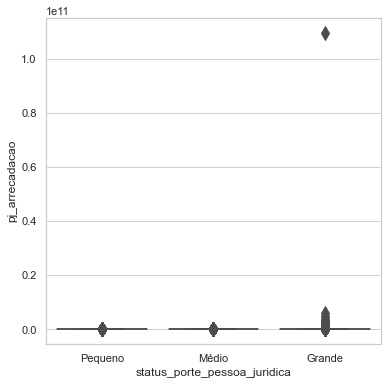

In [33]:
import seaborn as sns

sns.set_theme(style='whitegrid')

plt.figure(figsize=(6,6))
ax = sns.boxplot(x='status_porte_pessoa_juridica', y='pj_arrecadacao', 
                 data=dataset_classif_v1, fliersize=10)

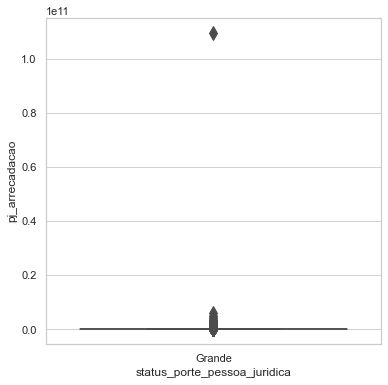

In [34]:

plt.figure(figsize=(6,6))
ax = sns.boxplot(x='status_porte_pessoa_juridica', y='pj_arrecadacao', 
                 data=dataset_classif_v1[(dataset_classif_v1['status_porte_pessoa_juridica']=='Grande')], fliersize=10)

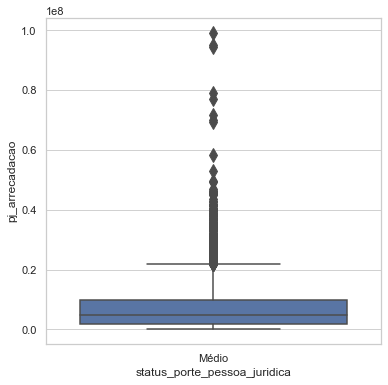

In [35]:

plt.figure(figsize=(6,6))
ax = sns.boxplot(x='status_porte_pessoa_juridica', y='pj_arrecadacao', 
                 data=dataset_classif_v1[(dataset_classif_v1['status_porte_pessoa_juridica']=='Médio')], fliersize=10)

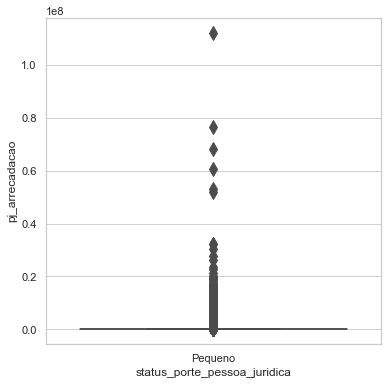

In [36]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(x='status_porte_pessoa_juridica', y='pj_arrecadacao', 
                 data=dataset_classif_v1[(dataset_classif_v1['status_porte_pessoa_juridica']=='Pequeno')], fliersize=10)


Como é possível verificar, os três grupos possuem muitos outliers, o que se deve, principalmente ao padrão do setor econômico.


In [37]:
dataset_classif_v1[(dataset_classif_v1['status_porte_pessoa_juridica']=='Pequeno')].describe()

,nr_pessoa_juridica,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,dctf_valor_suspenso,dctf_valor_parcelado,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp
count,"166,368.00","166,368.00","166,368.00","166,368.00","166,368.00","166,368.00","166,368.00","166,368.00","166,368.00","166,368.00","166,368.00","166,368.00","166,368.00","166,368.00","166,368.00","166,368.00"
mean,"15,221,940.17","1,714,276.16","183,199.10","147,929.28","88,958.89","7,981.38",70.38,0.00,534.07,125.04,"28,311.89","19,046.19","4,865.73","86,710.33","4,043.06","20,199.26"
std,"10,340,311.62","10,744,457.14","865,876.83","677,495.31","465,137.12","92,832.65","7,089.01",0.00,"27,213.73","7,654.77","335,898.94","1,720,015.21","236,353.72","2,491,322.73","279,981.91","924,838.63"
min,105.00,"-11,721,565.17",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"6,564,089.25",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"14,547,076.00",0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"21,840,301.00",0.00,"18,238.89","12,768.68",207.22,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00
max,"43,629,655.00","2,201,523,607.44","112,006,842.98","119,412,120.35","59,998,900.86","16,275,465.00","1,513,104.00",0.00,"8,735,012.86","1,260,424.91","115,503,313.19","657,913,125.33","38,772,546.18","287,969,280.86","95,030,226.02","361,000,000.00"


In [38]:
dataset_classif_v1[(dataset_classif_v1['status_porte_pessoa_juridica']=='Médio')].describe()

,nr_pessoa_juridica,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,dctf_valor_suspenso,dctf_valor_parcelado,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp
count,"4,686.00","4,686.00","4,686.00","4,686.00","4,686.00","4,686.00","4,686.00","4,686.00","4,686.00","4,686.00","4,686.00","4,686.00","4,686.00","4,686.00","4,686.00","4,686.00"
mean,"10,405,654.43","64,440,601.22","7,264,272.99","4,517,210.45","3,198,774.49","617,058.81","6,512.08",0.00,"40,930.06","3,751.51","337,950.93","523,226.30","491,655.56","4,696,895.60","116,037.85","1,535,981.68"
std,"6,857,254.71","63,989,686.31","8,238,109.80","4,979,710.78","4,429,236.05","1,411,110.70","152,361.60",0.00,"330,285.28","93,598.63","1,281,036.80","4,233,500.88","4,347,818.84","42,447,466.61","793,321.93","3,809,709.52"
min,"2,054.00","-44,899,382.84",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"4,786,772.75","28,763,816.54","1,668,673.00","1,038,834.99","200,553.80",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"9,540,038.00","49,779,187.66","4,927,630.97","3,148,599.77","1,626,510.34","44,780.50",0.00,0.00,0.00,0.00,0.00,0.00,0.00,"22,252.57",0.00,"197,190.26"
75%,"14,563,176.75","83,518,209.09","9,740,043.54","6,204,522.05","4,544,649.02","641,315.25",0.00,0.00,0.00,0.00,"1,193.58",0.00,0.00,"1,303,267.94",0.00,"1,424,393.44"
max,"35,594,584.00","1,205,069,927.62","99,162,897.66","68,576,094.76","67,936,149.66","33,402,899.00","6,306,839.00",0.00,"8,094,595.03","5,443,483.54","19,815,258.49","157,719,470.78","148,235,544.91","2,105,511,456.85","27,084,965.41","60,000,000.00"


In [39]:
dataset_classif_v1[(dataset_classif_v1['status_porte_pessoa_juridica']=='Grande')].describe()

,nr_pessoa_juridica,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,dctf_valor_suspenso,dctf_valor_parcelado,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp
count,"1,828.00","1,828.00","1,828.00","1,828.00","1,828.00","1,828.00","1,828.00","1,828.00","1,828.00","1,828.00","1,828.00","1,828.00","1,828.00","1,828.00","1,828.00","1,828.00"
mean,"9,859,271.60","949,134,185.78","155,136,203.43","89,431,169.06","72,519,261.66","13,957,957.48","350,580.89","78,734.64","1,761,270.74","5,116.29","473,581.87","10,616,904.03","24,918,446.39","195,046,550.70","2,175,179.44","27,522,400.52"
std,"6,264,934.43","7,338,800,166.25","2,576,159,181.63","1,212,577,985.88","1,201,047,091.16","63,393,709.11","5,897,490.96","3,366,308.57","17,392,241.97","103,881.96","2,788,094.85","129,694,298.40","219,055,421.64","2,314,988,225.71","17,277,647.83","104,213,635.90"
min,"11,966.00",0.00,0.00,90.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"5,744,718.00","166,706,119.80","15,840,434.72","8,833,313.70","2,549,654.01","289,786.25",0.00,0.00,0.00,0.00,0.00,0.00,0.00,"791,117.81",0.00,"665,685.42"
50%,"9,202,895.50","294,851,193.87","35,639,792.50","21,103,154.16","13,329,505.11","2,323,308.50",0.00,0.00,0.00,0.00,0.00,0.00,0.00,"5,585,222.21",0.00,"4,134,910.36"
75%,"11,937,847.75","567,720,497.30","70,761,408.97","43,505,227.53","31,573,016.94","8,109,143.75",0.00,0.00,0.00,0.00,0.00,"48,514.82","654,619.79","30,576,939.21","30,243.59","16,586,634.94"
max,"34,598,087.00","299,142,650,964.82","109,486,150,378.51","50,931,691,581.93","50,713,944,286.66","1,633,085,348.00","191,424,333.00","143,926,915.60","448,987,209.12","3,204,438.31","50,150,000.00","4,135,447,217.49","5,439,023,083.48","83,920,426,897.48","471,567,722.71","2,008,359,594.76"


O scatterplot abaixo mostra a distribuição dos valores de arrecadação dos grandes contribuintes, divididos em contribuintes 
especiais e diferenciados (todos especiais são diferenciados), mostrando a concentração da arrecadação e a existência de um outlier extremamente destacado.

<Figure size 432x432 with 0 Axes>

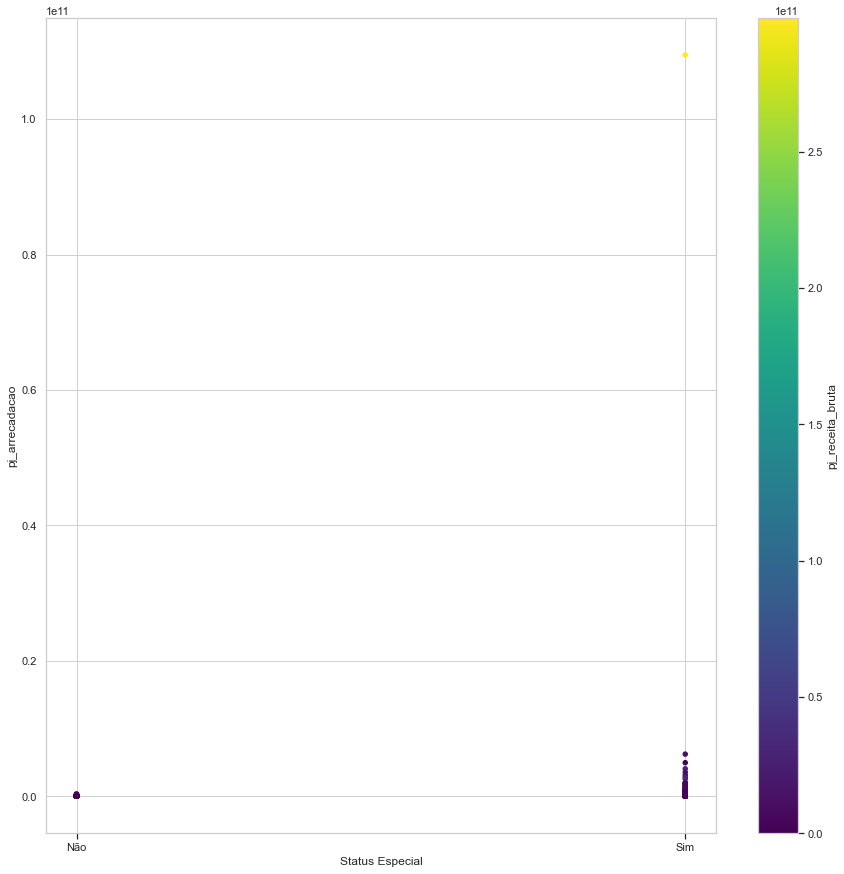

In [40]:
plt.figure(figsize=(6,6))

ax1 = dataset_classif_v1[dataset_classif_v1['status_porte_pessoa_juridica']=='Grande'].plot.scatter(x='status_especial',
                            y='pj_arrecadacao',c='pj_receita_bruta', colormap='viridis', figsize=(15,15))

ax1.tick_params(axis='x', bottom=True, labelbottom=True)

ax1.set_xlabel('Status Especial')
ax1.xaxis.get_label().set_visible(True)

O scatterplot abaixo mostra a distribuição dos valores de arrecadação dos demais contribuintes do setor, divididos pelo seu 
porte, mostrando a concentração da arrecadação e a existência de alguns outliers.

<Figure size 432x432 with 0 Axes>

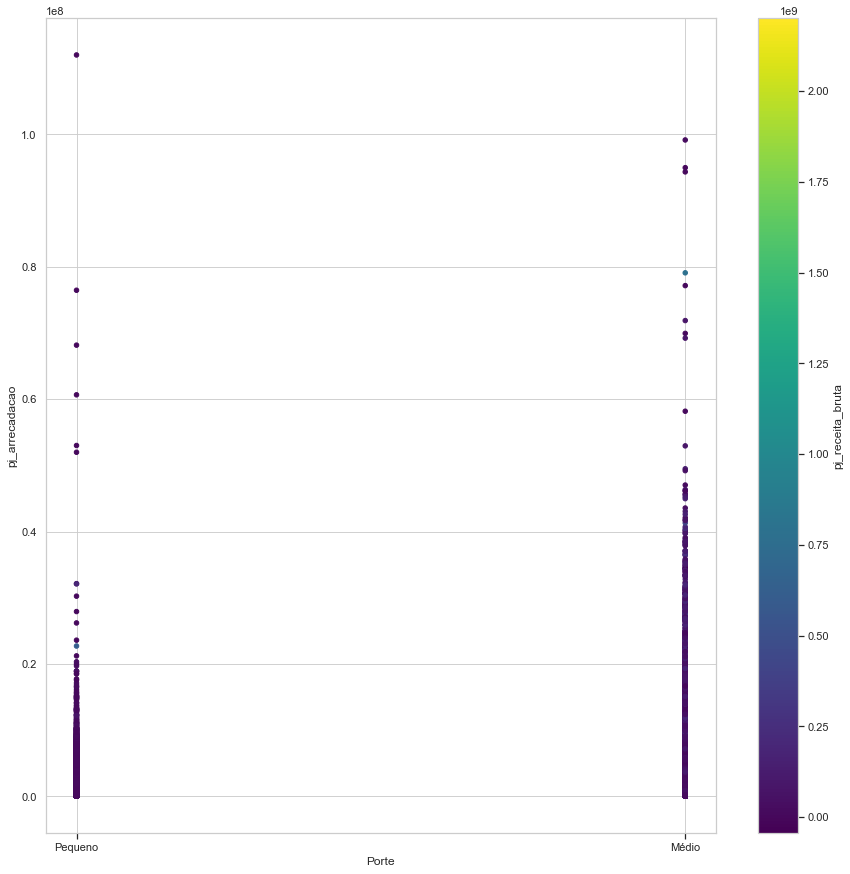

In [41]:
plt.figure(figsize=(6,6))
ax1 = dataset_classif_v1[dataset_classif_v1['status_porte_pessoa_juridica']!='Grande'].plot.scatter(y='pj_arrecadacao',
                                x='status_porte_pessoa_juridica', c='pj_receita_bruta', colormap='viridis', figsize=(15,15))

ax1.tick_params(axis='x', bottom=True, labelbottom=True)

ax1.set_xlabel('Porte')
ax1.xaxis.get_label().set_visible(True)

Considerando que a classificação busca estabelecer grupos com a maior homogeneidade interna possível, para que seja possível realizar a análise de séries temporais em grupos relevantes para predição da arrecadação do setor econômico, em uma primeira iteração manterei os outliers na base, buscando verificar se ocorrerão grupos de entropia, com um ou poucos membros. 

Após a avaliação dos clusters gerados, se necessário, refarei o dataset excluindo os outliers.

# 5. Criação do dataset final com codificação das variáveis categóricas

A existência de outliers na base pode significar que a classificação com base apenas na variáveis quantitativas não gerará
clusters relevantes. Por conta disso, pretendo utilizar, além do algoritmo k-means, com os dados quantitativos, experimentar a
classificação com o algoritmo k-prototypes, utilizando variáveis quantitativas e categóricas ao mesmo tempo. 

Para isso, codificarei os campos status_porte_pessoa_juridica com o método OneHotEncoding e os campos status_especial e status_diferenciada com o LabelEncoder (campos com valores 'Sim' e 'Não'). Como o campo omissao_dctf, após o tratamento de dados, possui apenas um valor ('Não'),
ele será excluído do dataset.

In [42]:
# Excluindo o campo omissao_dctf

dataset_classif_v1.drop('omissao_dctf', axis='columns', inplace=True)
dataset_classif_v1.head()

,nr_pessoa_juridica,status_porte_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,dctf_valor_suspenso,dctf_valor_parcelado,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp
0,27018624,Pequeno,Não,Não,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,12048428,Pequeno,Não,Não,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,18107915,Pequeno,Não,Não,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,27360348,Pequeno,Não,Não,0.00,0.00,"30,462.79",0.00,0.00,0.00,0.00,0.00,0.00,"30,462.79",0.00,0.00,0.00,0.00,0.00
4,15969714,Pequeno,Não,Não,0.00,"15,401.09","28,152.53","28,152.53",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [43]:
len(dataset_classif_v1)

172882

In [44]:
# Codificando os campos status_diferenciada e status_especial

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dataset_classif_v1['status_diferenciada'] = le.fit_transform(dataset_classif_v1['status_diferenciada'])
dataset_classif_v1['status_especial'] = le.fit_transform(dataset_classif_v1['status_especial'])

dataset_classif_v1.head()

,nr_pessoa_juridica,status_porte_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,dctf_valor_suspenso,dctf_valor_parcelado,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp
0,27018624,Pequeno,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,12048428,Pequeno,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,18107915,Pequeno,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,27360348,Pequeno,0,0,0.00,0.00,"30,462.79",0.00,0.00,0.00,0.00,0.00,0.00,"30,462.79",0.00,0.00,0.00,0.00,0.00
4,15969714,Pequeno,0,0,0.00,"15,401.09","28,152.53","28,152.53",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [45]:
# Codificando o campo status_porte_pessoa_juridica com a função get_dummies()

dataset_temp = dataset_classif_v1.copy()

y = pd.get_dummies(dataset_temp.status_porte_pessoa_juridica, prefix='Porte')

y.head()



,Porte_Grande,Porte_Médio,Porte_Pequeno
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [46]:
dataset_temp.head()

,nr_pessoa_juridica,status_porte_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,dctf_valor_suspenso,dctf_valor_parcelado,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp
0,27018624,Pequeno,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,12048428,Pequeno,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,18107915,Pequeno,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,27360348,Pequeno,0,0,0.00,0.00,"30,462.79",0.00,0.00,0.00,0.00,0.00,0.00,"30,462.79",0.00,0.00,0.00,0.00,0.00
4,15969714,Pequeno,0,0,0.00,"15,401.09","28,152.53","28,152.53",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [47]:
dataset_temp.drop('status_porte_pessoa_juridica', axis='columns', inplace=True)

dataset_temp = pd.concat([dataset_temp, y], axis=1)

dataset_temp.head()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_parcelado,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno
0,27018624,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1
1,12048428,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1
2,18107915,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1
3,27360348,0,0,0.00,0.00,"30,462.79",0.00,0.00,0.00,0.00,...,0.00,"30,462.79",0.00,0.00,0.00,0.00,0.00,0,0,1
4,15969714,0,0,0.00,"15,401.09","28,152.53","28,152.53",0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1


In [48]:
dataset_classif_final = dataset_temp.copy()

# 6. Gravação em arquivos csv para uso no notebook de classificação

Feitas as análises e ajustes, o dataset final será exportado em arquivo .csv para carga no notebook de classificação

In [49]:
dataset_classif_final.to_csv('puc_tcc_dataset_classif_final.csv', index=False)
